# Electric Car Thermal System for Battery Pack with Amesim Evaluation

This demo shows how thermal system architectures may be generated and automatically evaluated using simulation with Simcenter Amesim. Variants introduce additional parametric variability for the different components of the system.

## Reference model: Chevrolet Bolt
The acel model is inspired by the Chevrolet Bolt's thermal system.

![Chevrolet Bolt](Data/Bolt.png) 

## Formal model for generating the architectures

In [1]:
%acel clear
system Thermal_system:
owns:
    Electric_motor
    Battery_Pack
    Battery_cooling
    Pump
    PTC_Heater
    Radiator
    vehicle
    Splitter
    Temperature_source
    Directionnal_valve
    Node

scenarios:
    SFTP_US06

scenario::simulation SFTP_US06: ##The test cycle in this case is the SFTP-US06
    info:
        evaluationtool = "Amesim"
        starttime = 0 |s|
        endtime = 3000  |s|
        timestep = 10 |s|

asset::Amesim Electric_motor: ##creation of the asset Electric motor
    componentinfo:
        componentname=EM
        submodel=EM
    properties:
        multiplicity = 1
    ports::individual:
        in::currentA currentAin -> 7
        in::currentB currentBin -> 8
        in::Torque_Command port6 -> 6
        in::MotorTemperature port1 -> 1
        out::Rotational_Torque port2 -> 2
        out::Max_Min_Command port5 -> 5
        out::Rotaryspeed port4 -> 4
        out::Torque_commandp port3 ->3
    attributes:
        float |Nm| MaxTorque ->MaxTorque
        float |W| MaxPower ->MaxPower
        float |rev/min| MaxRev -> MaxRev 
        float |none| Efficency -> Efficency
        float |euro| cost -> None
    variants: ##Possible variants
        variant Eng240:
            MaxPower = 240000 |W|
            Efficency = 0.89 |none|
            MaxTorque = 320|Nm|
            MaxRev =9795|rev/min|
            cost =3500 |euro|
        variant Eng110:
            Efficency = 0.93|none|
            MaxPower = 110000|W|
            MaxTorque = 280|Nm|
            MaxRev =9795|rev/min|
            cost =2000 |euro|
    style:
        currentBin:position=bottom
        currentAin:position=bottom
        port6:position=top
        port5:position=right
        port3:position=top
        port4:position=top

asset::Amesim Battery_cooling: ##creation of the asset Electric motor cooling system
    componentinfo:
        componentname=Hydraulic_Cooling
        submodel=HYDRAULIC_COOLING
    properties:
        multiplicity = 1
    ports::individual:
        in::BatteryThermal port2 -> 2
        in::Hydraulic_PTC port1 -> 1
        out::Hydraulic port3 -> 3
        out::BatteryTemperatureSplit port4 -> 4
    attributes:
        float |kg| mass -> mass #mass of the engine
        float |mm| dh -> dh #hydraulic diameter of the pipe
        float |m| length -> length #hydraulic pipe length
        float |mm| wallt -> wallt #Wall Thickness
        float |euro| cost -> None
        float |degC| BatteryTemperature -> tini #Temperature of the electric motor
    variants:
        variant HydrauHigh:
            wallt = 2 |mm|
            length = 5 |m|
            dh = 10|mm|
            mass =435|kg|
            cost =0 |euro|
        variant HydrauLow:
            wallt = 10 |mm|
            length = 1 |m|
            dh = 25|mm|
            mass =435|kg|
            cost =0 |euro|
    style:
        port1:position=bottom
        port2:position=right
        port3:position=top
        port4:position=left

asset::Amesim Battery_Pack: ##creation of the asset Battery Pack
    componentinfo:
        componentname=Battery
        submodel=BATTERY
    properties:
        multiplicity = 1
    ports::individual:
        out::soc port4 -> 4
        out::currentA currentAout -> 2
        out::currentB currentBout -> 1
        out::BatteryThermal port3 -> 3
    attributes:
        float |Ah| Cnpack =260|Ah| ->Cnpack
        float |V| ocvFile =360|V| -> ocvFile
        float |none| InternalResistance -> resistFile
        float |none| StateofCharge = 100 |none| -> soc
        float |euro| cost -> None
    variants:
        variant BattHigh:
            InternalResistance=0.1|none|
            cost=1500 |euro| 
        variant BattLow:
            InternalResistance =0.05|none|
            cost=1000 |euro|
    style:
        currentBout:position=top
        currentAout:position=top
        port3:position=left
        port4:position=left

asset::Amesim PTC_Heater: #creation of the asset PTC Heater
    componentinfo:
        componentname=PTC_Heater
        submodel=PTC_HEATER
    properties:
        multiplicity = 1
    ports::individual:
        in::currentA currentAin->1
        in::BatteryTemperature port2->2
        in::currentB currentBin->3
        in::Hydraulic_PTC port4->4
        out::currentB currentBout->5
        out::currentA currentAout->6
        out::Hydraulic_PTC port7->7
    attributes:
        float |none| resistance -> k
        float |none| high_Threshold = 30 |none| -> smax #Temperature untill which the PTC heater will warm up
        float |none| low_Threshold = 27 |none| -> smin #Temperature at which the PTC will warm up again
        float |euro| cost -> None
    variants:
        variant PTC_High:
            resistance = 20 |none|
            cost= 150 |euro|
        variant PTC_Low:
            resistance = 40 |none|
            cost= 100 |euro|
    style:
        currentAin:position=bottom
        currentBin:position=bottom
        currentAout:position=top
        currentBout:position=top

asset::Amesim Directionnal_valve: ##creation of the asset Directionnal valve
    componentinfo:
        componentname=Directional_valve
        submodel=DIRECTIONAL_VALVE
    properties:
        multiplicity = 1
    ports:
        in::Hydraulic port1 ->1
        in::BatteryTemperature port4 ->4
        out::Hydraulic_by port2 ->2
        out::Hydraulic_rad port3 ->3
    attributes: 
        float |none| high_Threshold = 30.5 |none| ->smax #Temperature untill which the directional valve will send the coolant in the Bypass 
        float |none| low_Threshold = 29.5 |none| ->smin #Temperature at which the directional valve will send the coolant in the Bypass again 
        float |L/min| PtoA =25|L/min| ->qpa
        float |L/min| PtoT =25|L/min| ->qpt
        float |euro| cost=0 |euro| -> None
    style:
        port1:position=bottom
        port2:position=bottom
        port3:position=top
        port4:position=left

asset::Amesim Pump: ##creation of the asset Pump
    componentinfo:
        componentname=Pump
        submodel=PUMP
    properties:
        multiplicity = 1
    ports::individual:
        in::currentA currentAin-> 1
        in::currentB currentBin->2
        in::Torque_commandp port6-> 6
        in::Hydraulic port3->3
        out::currentA currentAout->4
        out::currentB currentBout->5
        out::Hydraulic_PTC port7->7
    style:
        currentAin:position=bottom
        currentAout:position=top
        currentBin:position=bottom
        currentBout:position=top
        port6:position=left
        port3:position=right
        port7:position=left
    attributes:
        float |Nm| MaxTorque ->maxT
        float |W| MaxPower ->maxP
        float |rev/min| MaxSpeed ->maxW
        float |euro| cost -> None
    variants:
        variant pumpHigh:
            MaxTorque = 40 |Nm|
            MaxPower = 150 |W|
            MaxSpeed = 1000|rev/min|
            cost=45 |euro|
        variant pumplow:
            MaxTorque = 10 |Nm|
            MaxPower = 75 |W|
            MaxSpeed = 400|rev/min|
            cost=30|euro|

asset::Amesim Radiator:##creation of the asset Radiator
    componentinfo:
        componentname=Radiator
        submodel=RADIATOR
    properties:
        multiplicity = 1
    ports::individual:
        in::Hydraulic_rad port3-> 3
        in::velocity_command port2->2
        in::BatteryTemperature port4-> 4
        out::Hydraulic port1->1
    style:
        port1:position=bottom
        port2:position=right
        port3:position=top
        port4:position=left
    attributes:
        float |L| Volume -> vol
        float |none| AeroCoef ->krad
        float |none| high_Threshold = 72 |none| ->smax #Temperature untill which the ventillator is off
        float |none| low_Threshold = 68 |none| ->smin #Temperature from which the ventillator is off again
        float |euro| cost-> None
    attributes:
        float |none| OutPut ->out1
    variants:
        variant RadHigh:
            AeroCoef =0.32|none|
            Volume =1.4|L|
            cost=180|euro|
        variant RadLow:
            AeroCoef =0.28|none|
            Volume =5|L|
            cost=160|euro|

asset::Amesim vehicle: ##creation of the asset Vehicle
    componentinfo:
        componentname=Vehicle
        submodel=VEHICLE
    properties:
        multiplicity = 1
    ports::individual:
        in::soc port6-> 6
        in::Max_Min_Command port2->2
        in::Rotaryspeed port4-> 4
        in::Rotational_Torque port5->5
        out::Torque_Command port1->1
        out::velocity_command port3->3
    style:
        port1:position=bottom
        port2:position=bottom
        port3:position=right
        port4:position=bottom
        port5:position=bottom
        port6:position=left
    attributes:
        float |kg| mtot=1525|kg| -> mtot
        float |none| Cx =0.29|none| ->Cx
        float |euro| cost=0 |euro|-> None
        float |m/s| Velocity -> speed

asset ::Amesim Splitter: ##creation of the asset Splitter
    properties:
        multiplicity=1
    componentinfo:
        componentname=splitter3p
        submodel=SPLT1
    attributes:
        float |euro| cost=0 |euro|-> None
    ports::individual:
        in::BatteryTemperatureSplit port4 -> 4
    ports::group 1:
        out::BatteryTemperature port2 -> 2
        out::BatteryTemperature port1 -> 1
        out::BatteryTemperature port3 -> 3

asset ::Amesim Temperature_source: ##creation of the asset Temperature soucre for the motor
    properties:
        multiplicity=1
    componentinfo:
        componentname=th_temperature_source
        submodel=THTS1
    attributes:
        float |euro| cost=0 |euro|-> None
    ports::individual:
        out::MotorTemperature port1 -> 1

asset ::Amesim Node: ##creation of the asset Temperature soucre for the motor
    properties:
        multiplicity=1
    componentinfo:
        componentname=Hydraulic_Node
        submodel=HYDRAULIC_NODE
    attributes:
        float |euro| cost=0 |euro|-> None
    ports::individual:
        out::Hydraulic port2 -> 2
        in::Hydraulic_by port1 -> 1
        in::Hydraulic port3 -> 3

connections::limiting: 
Battery_Pack-[2..2]-Pump
Battery_Pack-[2..2]-PTC_Heater
Battery_cooling-[1..1]-Radiator  ##limiting electric and hydraulic connections to ensure one hydraulic and one electric loop
Battery_cooling-[1..1]-Pump
Battery_cooling-[1..1]-Directionnal_valve
Pump-[1..1]-Radiator
Pump-[1..1]-Directionnal_valve
Pump-[1..1]-Node
Radiator-[1..1]-Directionnal_valve
Radiator-[1..1]-Node
Node-[1..1]-Directionnal_valve

connections::restrictive:
Battery_Pack--Electric_motor

In [2]:
acel.lib.displayHierarchicalView(acel.Thermal_system)
architectures=acel.lib.solve(acel.Thermal_system,outputTime =100)
acel.lib.displayArchitectures(architectures)

Run: Thermal_system - 
 - - - - - - - - - - - - - - -
Creating ensembles...
... done in 0.158 seconds.
 - 1 total ensembles
... Instantiating ensembles...
 ... 100.00% instantiated in 0.019 seconds
 - 1 ensembles
... done in 0.180 seconds, maximum tree width = 0, maximum multiplicity = 1.
 - - - - - - - - - - - - - - -
Creating architectures...
 - 2 unique architectures in 0.046 seconds
... done in 0.046 seconds.
 - - - - - - - - - - - - - - -
 - - - - - - - - - - - - - - -
 - - - - - - - - - - - - - - -
Done: Thermal_system - 
 -  1 Ensemble
 -  2 Architectures
 -  2 Iterations
 -  0 Unconnected Solutions
 -  0 Symmetric Solutions
 -  0.046 " Total ConnectionSolving
 -  0.001 " SAT Solving
 -  0.002 " Filtering
 -  0.000 " Data Interpretation
 -  0.000 " File IO
 -  771.8 MB Memory Usage


## Evaluations of the architectures

In [3]:
%service start simulation -n 10 -p Thermal_system

Starting Simcenter Studio Simulation 2404 service...
Starting APIs (usually takes about 10 seconds)...
Done


In [4]:
acel.lib.evaluate(acel.Thermal_system, architectures, userLibraries=['SubmodelsThermal'], debug=False, pool='Thermal_system', directory="simulation")

Realizing Architectures...


---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File Cell [4]:1
----> 1 acel.lib.evaluate(acel.Thermal_system, architectures, userLibraries=['SubmodelsThermal'], debug=False, pool='Thermal_system', directory="simulation")

File scs_acel/acel_lib.py:197, in scs_acel.acel_lib.evaluate()

File scs_systemevaluation/systemevaluation.py:127, in scs_systemevaluation.systemevaluation.SystemEvaluation.realize()

File scs_systemevaluation/simulation/simulationexporter.py:157, in scs_systemevaluation.simulation.simulationexporter.SimulationExporter.export()

File scs_systemevaluation/simulation/simulationexporter.py:149, in scs_systemevaluation.simulation.simulationexporter.SimulationExporter.export()

File scs_systemevaluation/simulation/simulationexporter.py:187, in scs_systemevaluation.simulation.simulationexporter.SimulationExporter.__evaluateConfiguration()

File scs_systemevaluation/simul

In [5]:
%service stop simulation -p Thermal_system

Stopping Simcenter Studio Simulation service...
Done


Evaluation of __2 architectures__ with __64 configurations__ for each, based on the variants in the table below:

![Thermal_system variants](Data/Thermalsystemvariants.png) 

Total of __128 configurations__

## Architectures evaluation and post processing data

In [6]:
results = acel.lib.results(acel.Thermal_system.name)


import plotly.express as px
px.line(results.get(), x='Time', y='Battery_cooling_0.BatteryTemperature', color='Simulation')

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File Cell [6]:5
      1 results = acel.lib.results(acel.Thermal_system.name)
      4 import plotly.express as px
----> 5 px.line(results.get(), x='Time', y='Battery_cooling_0.BatteryTemperature', color='Simulation')

File scs_systemevaluation/results/handler.py:384, in scs_systemevaluation.results.handler.ResultsHandler.get()

File /usr/local/lib/python3.11/dist-packages/h5py/_hl/files.py:562, in File.__init__(self, name, mode, driver, libver, userblock_size, swmr, rdcc_nslots, rdcc_nbytes, rdcc_w0, track_order, fs_strategy, fs_persist, fs_threshold, fs_page_size, page_buf_size, min_meta_keep, min_raw_keep, locking, alignment_threshold, alignment_interval, meta_block_size, **kwds)
    553     fapl = make_fapl(driver, libver, rdcc_nslots, rdcc_nbytes, rdcc_w0,
    554                      locking, page_buf_size, min_meta_keep, min_raw_ke

## Creation of the CSV file

In [7]:
import pandas

Tmax=34
counter=0
totalcost = 0
data_frame = results.get(scenarios = 'SFTP_US06')

csvdict = {'Architecture name': [],
           'Time to reach 30 degrees': [],
           'Final state of charge': [],
           'Battery Pack variant': [],
           'PTC Heater variant': [],
           'Ventilator switches': [],
           'Total cost': [],
           'Motor variant': [],
           'Hydraulic cooling system': [],
           'Pump variant': [],
           'Radiator variant': []}

variantmatching = {'Electric_motor_0': 'Motor variant',
                'Battery_cooling_0': 'Hydraulic cooling system',
                'Battery_Pack_0': 'Battery Pack variant',
                'PTC_Heater_0': 'PTC Heater variant',
                'Pump_0': 'Pump variant',
                'Radiator_0': 'Radiator variant'}

for a in architectures:
    for c in a.getConfigurations(iterator = True):
        architecturename = c.getName()
        architecture_query = data_frame.query("Configuration==@architecturename")
        if architecture_query['Battery_cooling_0.BatteryTemperature'].max()<Tmax:
            csvdict['Architecture name'].append(architecturename)
            csvdict['Time to reach 30 degrees'].append(architecture_query.query("`Battery_cooling_0.BatteryTemperature` >= 30")["Time"].iloc[0])
            csvdict['Final state of charge'].append(architecture_query["Battery_Pack_0.StateofCharge"].iloc[-1])
            for i in range (len(architecture_query["Radiator_0.OutPut"]) -1):
                counter += int(architecture_query["Radiator_0.OutPut"].iloc[i] != architecture_query["Radiator_0.OutPut"].iloc[i+1])    
            csvdict['Ventilator switches'].append(counter)
            counter=0         
            conf_dict =c.getVariantInfo()
            for key, val in conf_dict.items():
                csvdict[variantmatching[key]].append(val)

            for component in c.getConfiguration().getCompleteListOfBlocks(withParent = False):
                totalcost+=component.getVariable('cost').getValue()
            csvdict['Total cost'].append(totalcost)
            totalcost=0

pandas.DataFrame(csvdict).to_csv('Thermal_system_results.csv', index=False)

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File Cell [7]:6
      4 counter=0
      5 totalcost = 0
----> 6 data_frame = results.get(scenarios = 'SFTP_US06')
      8 csvdict = {'Architecture name': [],
      9            'Time to reach 30 degrees': [],
     10            'Final state of charge': [],
   (...)
     17            'Pump variant': [],
     18            'Radiator variant': []}
     20 variantmatching = {'Electric_motor_0': 'Motor variant',
     21                 'Battery_cooling_0': 'Hydraulic cooling system',
     22                 'Battery_Pack_0': 'Battery Pack variant',
     23                 'PTC_Heater_0': 'PTC Heater variant',
     24                 'Pump_0': 'Pump variant',
     25                 'Radiator_0': 'Radiator variant'}

File scs_systemevaluation/results/handler.py:384, in scs_systemevaluation.results.handler.ResultsHandler.get()

File /usr/loca

## Example results from Discover

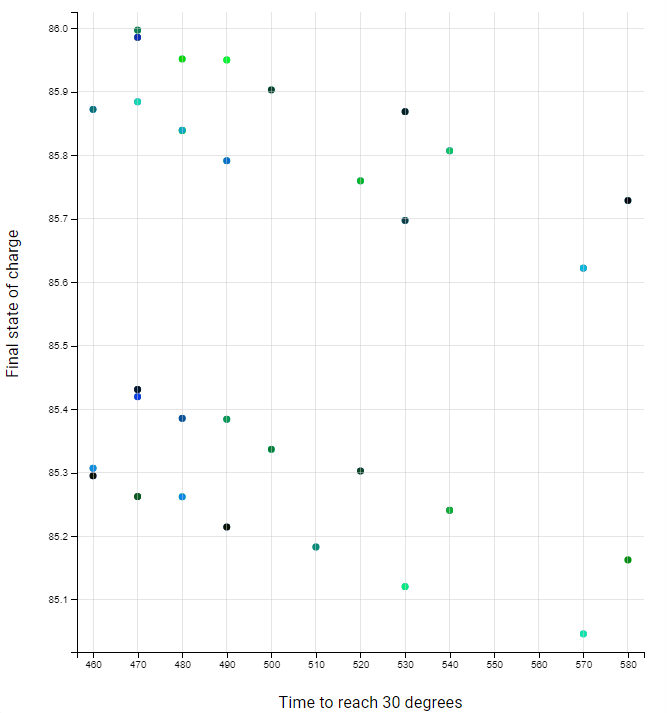